# The Data pre-processing of Twitter Sentiment Analysis:

## Pre-processing guidelines

### File structure

The output of the pre-processing has to be a .cvs file. Please create one file for each dataset.

The file will be organised in 5 columns as follows:

 | corpus_name | raw_sentence | label | clean_sentence_training | clean_sentence_EDA |
  |-|-|-|-|-|
 | | | | | |
 | | | | | |
  
 Please respect the column order and naming. For the corpus name, please use the same label you use as a name for your directory (e.g., HateXplain).
 
 ### Labels
 
 > Please note that the labels have changed!
 
 The labels will be:
 - '2' for RISKY sentences (eg., 'hateful' or 'abusive');
 - '1' for POTENTIALLY RISKY sentences (e.g., 'offensive)';
 - '0' for NON RISKY sentences.

We leave to the collaborators the task to determine how to fit the original labels in the three classes above. Please contact the task leaders if unsure about the classification. We'll be most happy to help you decide how to re-label your dataset.

### Preprocessing

The pre-processing for the 'clean_sentence_training' column will involve the following steps:

1- delete all rows containing null values;

2- stopwords removal;

3- lemmatization (no NOT perform stemming at it can yield undesirable results);

Please do NOT change the case of your sentences as the distinction between lowercase and uppercase can be meaningful in this context.

The pre-processing for the 'clean_sentence_EDA' will involve all the steps above, *plus the deletion of all emojis* (if present).


In [67]:
# Importing all the required libraries
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import pandas as pd
import numpy as np
import re
import string
import nltk
import emoji
nltk.download('wordnet')
# %pip install WordCloud


[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/dr.rubaiyatislam/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [68]:
# Loading the train and test dataset downloaded from https://www.kaggle.com/datasets/arkhoshghalb/twitter-sentiment-analysis-hatred-speech
train = pd.read_csv("train.csv")
print(train.head())
test = pd.read_csv("test.csv")
print(test.head())
print(len(test), len(train))


   id  label                                              tweet
0   1      0   @user when a father is dysfunctional and is s...
1   2      0  @user @user thanks for #lyft credit i can't us...
2   3      0                                bihday your majesty
3   4      0  #model   i love u take with u all the time in ...
4   5      0             factsguide: society now    #motivation
      id                                              tweet
0  31963  #studiolife #aislife #requires #passion #dedic...
1  31964   @user #white #supremacists want everyone to s...
2  31965  safe ways to heal your #acne!!    #altwaystohe...
3  31966  is the hp and the cursed child book up for res...
4  31967    3rd #bihday to my amazing, hilarious #nephew...
17197 31962


### Checking Missing values:

Missing values in train data:
id       0
label    0
tweet    0
dtype: int64
----------------------------------------
Missing values in test data:
id       0
tweet    0
dtype: int64


<Figure size 1000x600 with 0 Axes>

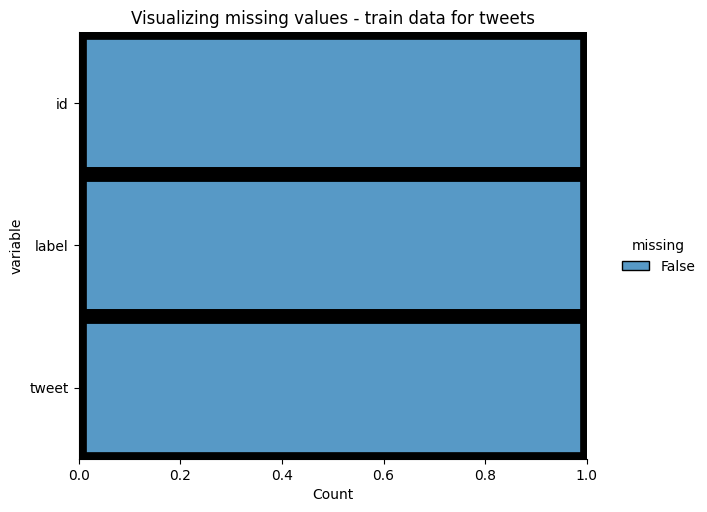

In [69]:
# Missing values check
print(f'Missing values in train data:\n{train.isnull().sum()}')
print('-'*40)
print(f'Missing values in test data:\n{test.isnull().sum()}')
# visualization of missing values
plt.figure(figsize=(10, 6))
sns.displot(
    data=train.isna().melt(value_name='missing'),
    y='variable',
    hue='missing',
    multiple='fill',
    aspect=1.25)

plt.title('Visualizing missing values - train data for tweets')
plt.show()
# No missing values were detected


0    29720
1     2242
Name: label, dtype: int64


/Users/dr.rubaiyatislam/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


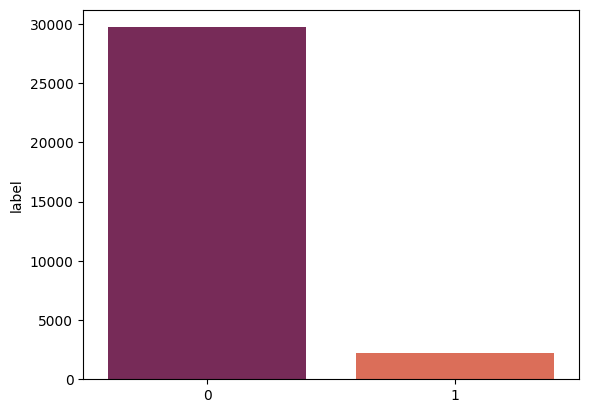

In [70]:
# checking all labels with hate-speech = '1' and non-hate-speech = '0' values
print(train['label'].value_counts())
# visualization of hate and no-hate annotation
sns.barplot(train['label'].value_counts().index,
            train['label'].value_counts(), palette='rocket')
plt.show()


### Finding emoji in the tweets:

In [71]:
# function to check for emojis
emojis = []


def finding_emojis(emo):
    result = ''.join(c for search in emo if search in emoji.EMOJI_DATA)
    return result


emojis.append(finding_emojis(train['tweet']))
print(emojis)
# No emojis were found


['']


### Text cleaning:
- remove digits, 
- punctuation, 
- special characters,
- extra spaces,
- links.

In [72]:
# Applying a first round of text cleaning techniques

def clean_text(text):
    '''
    remove digits, punctuation, special characters, extra spaces, links
    '''

    text = re.sub('\[.*?\]', '', text)
    text = re.sub('[ð]', '', text)
    text = re.sub('\w*[\d@]\w*', '', text)
    text = re.sub('[A-Za-z]+\d+|\d+[A-Za-z]+', '', text).strip()
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('^RT[\s]+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    text = re.sub('\±\ð\$\%\&\@+\"\'\,', '', text)
    return text


# Applying the cleaning function to both test and training datasets
train['clean_sentence_training'] = train['tweet'].apply(
    lambda x: clean_text(x))

# Let's take a look at the updated text
train['clean_sentence_training'].head()


0    when a father is dysfunctional and is so selfi...
1    thanks for lyft credit i cant use cause they d...
2                                  bihday your majesty
3    model   i love u take with u all the time in u...
4                 factsguide society now    motivation
Name: clean_sentence_training, dtype: object

In [73]:
train.head()

,id,label,tweet,clean_sentence_training
0,1,0,@user when a father is dysfunctional and is s...,when a father is dysfunctional and is so selfi...
1,2,0,@user @user thanks for #lyft credit i can't us...,thanks for lyft credit i cant use cause they d...
2,3,0,bihday your majesty,bihday your majesty
3,4,0,#model i love u take with u all the time in ...,model i love u take with u all the time in u...
4,5,0,factsguide: society now #motivation,factsguide society now motivation


### Stop word removal and lemmatization:


In [74]:
#Downloading packages 
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/dr.rubaiyatislam/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/dr.rubaiyatislam/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/dr.rubaiyatislam/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     /Users/dr.rubaiyatislam/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [75]:
train.head()

,id,label,tweet,clean_sentence_training
0,1,0,@user when a father is dysfunctional and is s...,when a father is dysfunctional and is so selfi...
1,2,0,@user @user thanks for #lyft credit i can't us...,thanks for lyft credit i cant use cause they d...
2,3,0,bihday your majesty,bihday your majesty
3,4,0,#model i love u take with u all the time in ...,model i love u take with u all the time in u...
4,5,0,factsguide: society now #motivation,factsguide society now motivation


In [76]:
def preprocess_tweets(df):
    # drop rows with missing values
    df = df.dropna()

    # remove stopwords
    stop_words = set(stopwords.words("english"))
    df["clean_sentence_training"] = df["clean_sentence_training"].apply(lambda x: " ".join(
        [word for word in word_tokenize(x) if word.lower() not in stop_words]))

    # lemmatization
    lemmatizer = WordNetLemmatizer()
    df["clean_sentence_training"] = df["clean_sentence_training"].apply(
        lambda x: " ".join([lemmatizer.lemmatize(word) for word in word_tokenize(x)]))

    return df


# example usage
df = preprocess_tweets(train)
df.head()


,id,label,tweet,clean_sentence_training
0,1,0,@user when a father is dysfunctional and is s...,father dysfunctional selfish drag kid dysfunct...
1,2,0,@user @user thanks for #lyft credit i can't us...,thanks lyft credit cant use cause dont offer w...
2,3,0,bihday your majesty,bihday majesty
3,4,0,#model i love u take with u all the time in ...,model love u take u time ur±  ¦...
4,5,0,factsguide: society now #motivation,factsguide society motivation


### Finalizing the dataframe as per gudelines: 

In [77]:
# rename columns to match the appropriate format requested in the repo
df = df.rename(columns={'tweet': 'raw_sentence'})
# make a column called corpus that contains the text Toxic Comment Classification Challenge
df = df.assign(
    corpus_name=lambda x: 'hate_speech_dataset_twitter_sentiment_analysis')
# duplicate the clean_sentence_training, to become clean_sentence_EDA since there were no emojis
df['clean_sentence_EDA'] = df['clean_sentence_training']
# select only relevant columns
df = df[['corpus_name', 'raw_sentence', 'label',
         'clean_sentence_training', 'clean_sentence_EDA']]
df.head()


,corpus_name,raw_sentence,label,clean_sentence_training,clean_sentence_EDA
0,hate_speech_dataset_twitter_sentiment_analysis,@user when a father is dysfunctional and is s...,0,father dysfunctional selfish drag kid dysfunct...,father dysfunctional selfish drag kid dysfunct...
1,hate_speech_dataset_twitter_sentiment_analysis,@user @user thanks for #lyft credit i can't us...,0,thanks lyft credit cant use cause dont offer w...,thanks lyft credit cant use cause dont offer w...
2,hate_speech_dataset_twitter_sentiment_analysis,bihday your majesty,0,bihday majesty,bihday majesty
3,hate_speech_dataset_twitter_sentiment_analysis,#model i love u take with u all the time in ...,0,model love u take u time ur±  ¦...,model love u take u time ur±  ¦...
4,hate_speech_dataset_twitter_sentiment_analysis,factsguide: society now #motivation,0,factsguide society motivation,factsguide society motivation


### Exporting the final dataframe to csv file:

In [78]:

df.to_csv('Hate_speech_dataset_Twitter_sentiment_analysis.csv')


### Vusializing the word clouds:

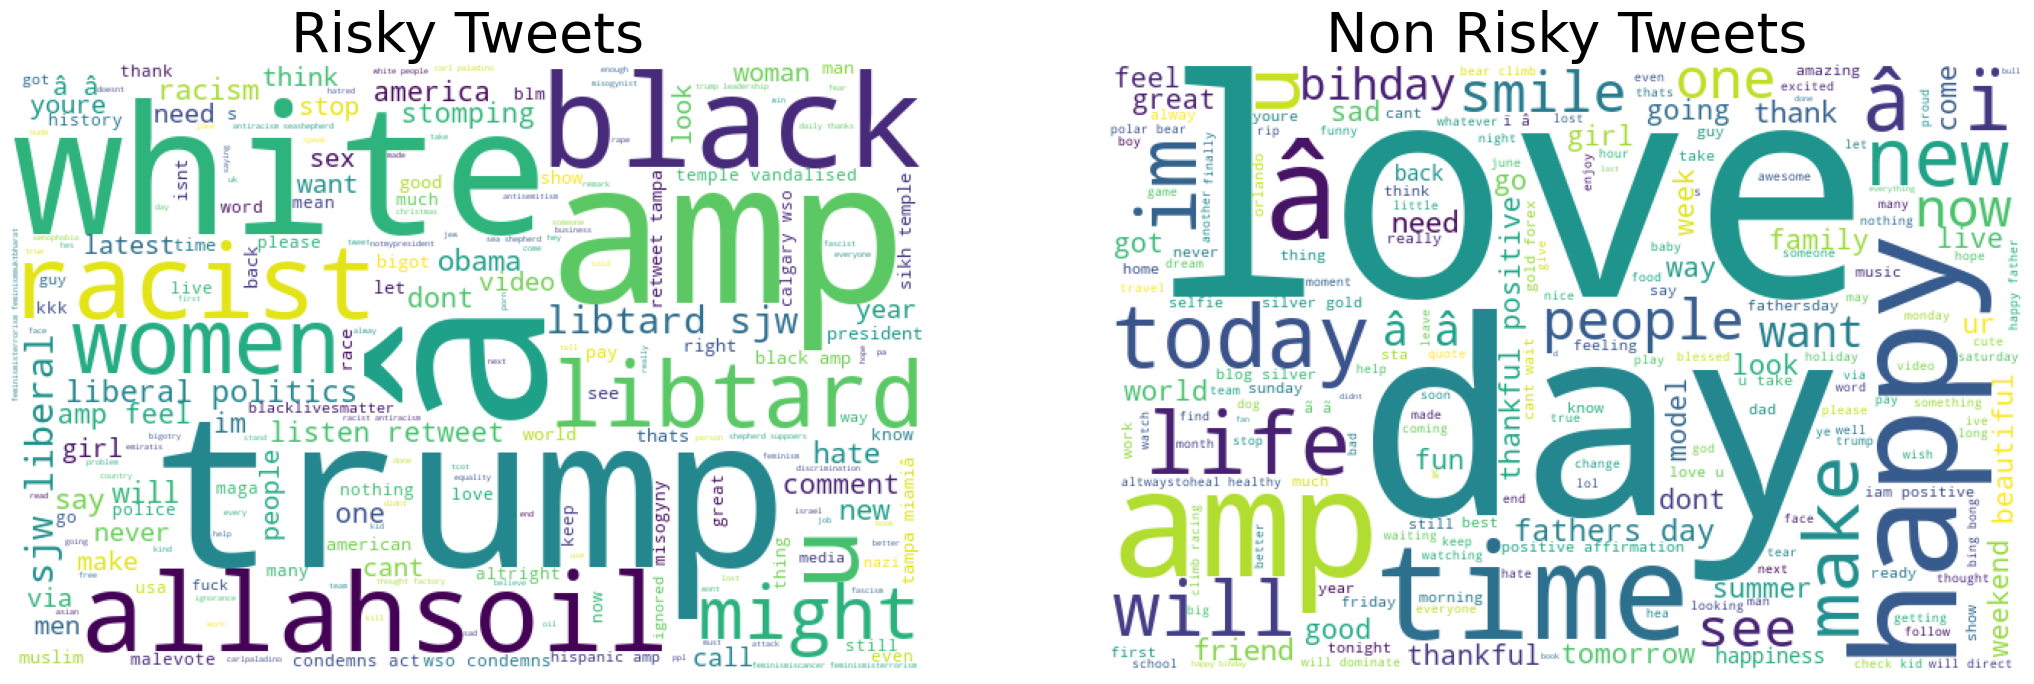

In [79]:
# A risky annotated tweet
risky_tweets = train[df['label']==1]['clean_sentence_training']
# A risky annotated tweet
non_risky_tweets = train[df['label']==0]['clean_sentence_training']
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=[26, 8])
wordcloud1 = WordCloud( background_color='white',
                        width=600,
                        height=400).generate(" ".join(risky_tweets))
ax1.imshow(wordcloud1)
ax1.axis('off')
ax1.set_title('Risky Tweets',fontsize=40);

wordcloud2 = WordCloud( background_color='white',
                        width=600,
                        height=400).generate(" ".join(non_risky_tweets))
ax2.imshow(wordcloud2)
ax2.axis('off')
ax2.set_title('Non Risky Tweets',fontsize=40);
plt.show()
